# Prueba #6: Gesti√≥n de datos con ElasticSearch y visualizaci√≥n con Matplotlib

## Dante Saavedra

### Cargar Dataset

#### Importaciones

In [2]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers

import pandas as pd

import matplotlib.pyplot as plt

from pprint import pprint

import datetime

import json

import os

#### Crear indice en Elasticsearch

In [3]:
es = Elasticsearch()

if not(es.indices.exists(index="prueba_6")):
    res = es.indices.create(index="prueba_6")

files = os.listdir("tweets")
pprint(len(files))

354586


#### Cargar datos en Elasticsearch

In [6]:
tweets=[]
def cargarDatos():
    for filename in files:
        with open('tweets/'+filename) as f:
            try:
                tweet = json.load(f)
                timestamp = int(tweet["timestamp_ms"])
                simple_tweet = {
                    "timestamp":timestamp,
                    "date":tweet["created_at"],
                    "text": tweet['text'],
                    "username": tweet['user']['name'],
                    "location": tweet['user']['location']
                }
                tweets.append(simple_tweet) 
            except KeyError:
                error="error"



        #CARGAMOS LOS DATOS EN ELASTICSEARCH CON CONSULTAS 'BULK' PARA OPTIMIZAR EL PROCESO
        if (len(tweets)>=1000):
            i=0
            docs_as_string="["
            while i<1000:
                if i!=0:
                    docs_as_string = docs_as_string + ','
                docs_as_string = docs_as_string + '\n' + json.dumps(tweets[i])
                i=i+1
            docs_as_string=docs_as_string+"]"
            res = helpers.bulk(es, json.loads(docs_as_string),index="prueba_6", doc_type="_doc")
            tweets=[]

## Preguntas

### 1. En un histograma o en un line plot, visualizar el n√∫mero de tweets conteniendo la palabra ‚Äúgoal‚Äù:

#### a) Cada Minuto

##### Funci√≥n para convertir timestamp a time

In [4]:
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

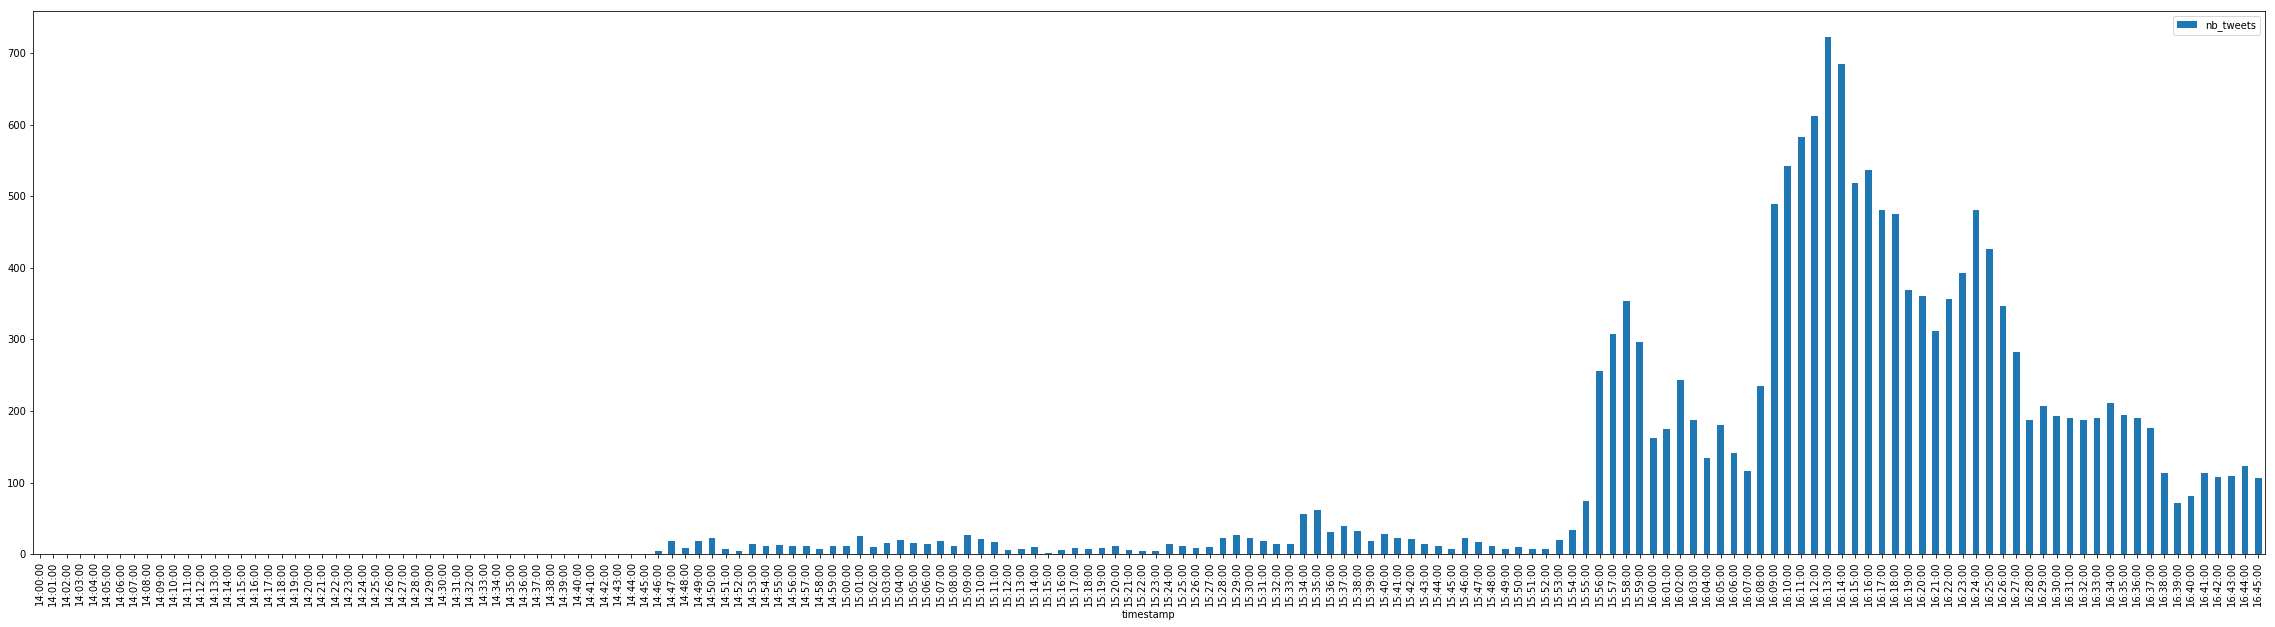

In [5]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "term":{
                            "text":"goal" #<----- Filtrar la palabra Goal
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minuto
                            }
                        }
                    }
                }) 
df_goalByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_goalByMinutes = df_goalByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
## Filtrar Datos
df_goalByMinutes_filtered = df_goalByMinutes.drop(df_goalByMinutes[df_goalByMinutes.timestamp < 1527357600000 ].index)
## Cambiar Dato timestamp a tipo date
df_goalByMinutes_filtered['timestamp']=df_goalByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_goalByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### b) Cada 10 Minutos

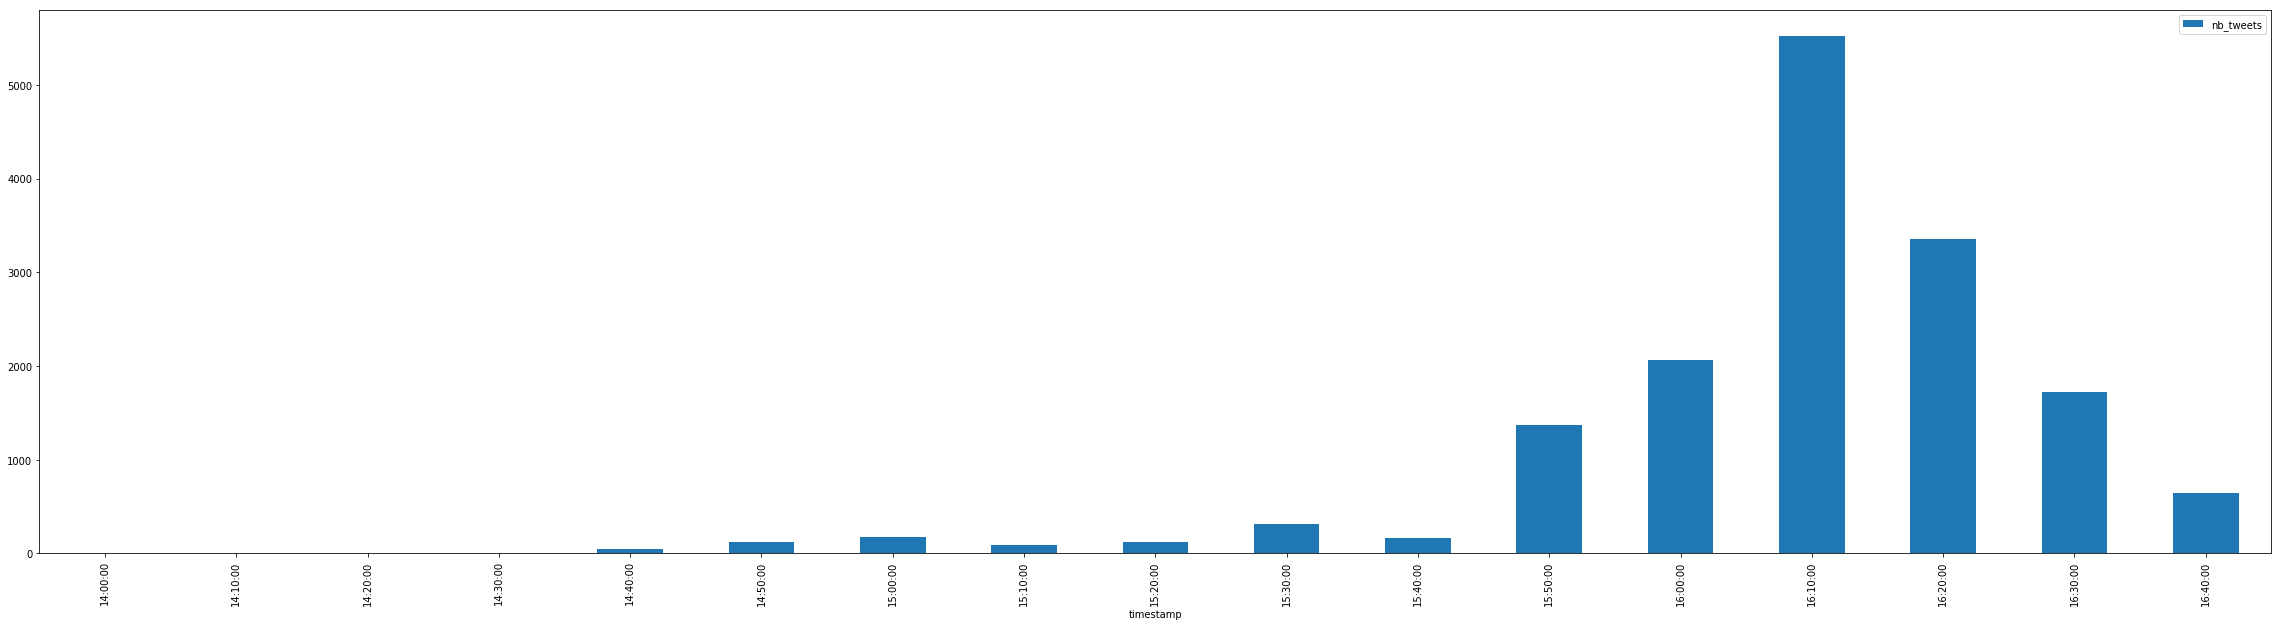

In [6]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "term":{
                            "text":"goal" #<----- Filtrar la palabra Goal 
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "10m" #<----- 10 Minutos
                            }
                        }
                    }
                }) 
df_goalBy10Minutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_goalBy10Minutes = df_goalBy10Minutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
## Filtrar Datos
df_goalBy10Minutes_filtered = df_goalBy10Minutes.drop(df_goalBy10Minutes[df_goalBy10Minutes.timestamp < 1527357600000 ].index)
## Cambiar Dato timestamp a tipo date
df_goalBy10Minutes_filtered['timestamp']=df_goalBy10Minutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_goalBy10Minutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### Bonus: gestionar las variantes ‚Äúgoaaal‚Äù, ‚Äúgoooaallll‚Äù, etc. utilizando expresiones regulares

### 2. En un histograma o en un line plot, visualizar dos series de datos: 

#### a) El n√∫mero de tweets que hablan de ‚Äòliverpool‚Äô por cada minuto.

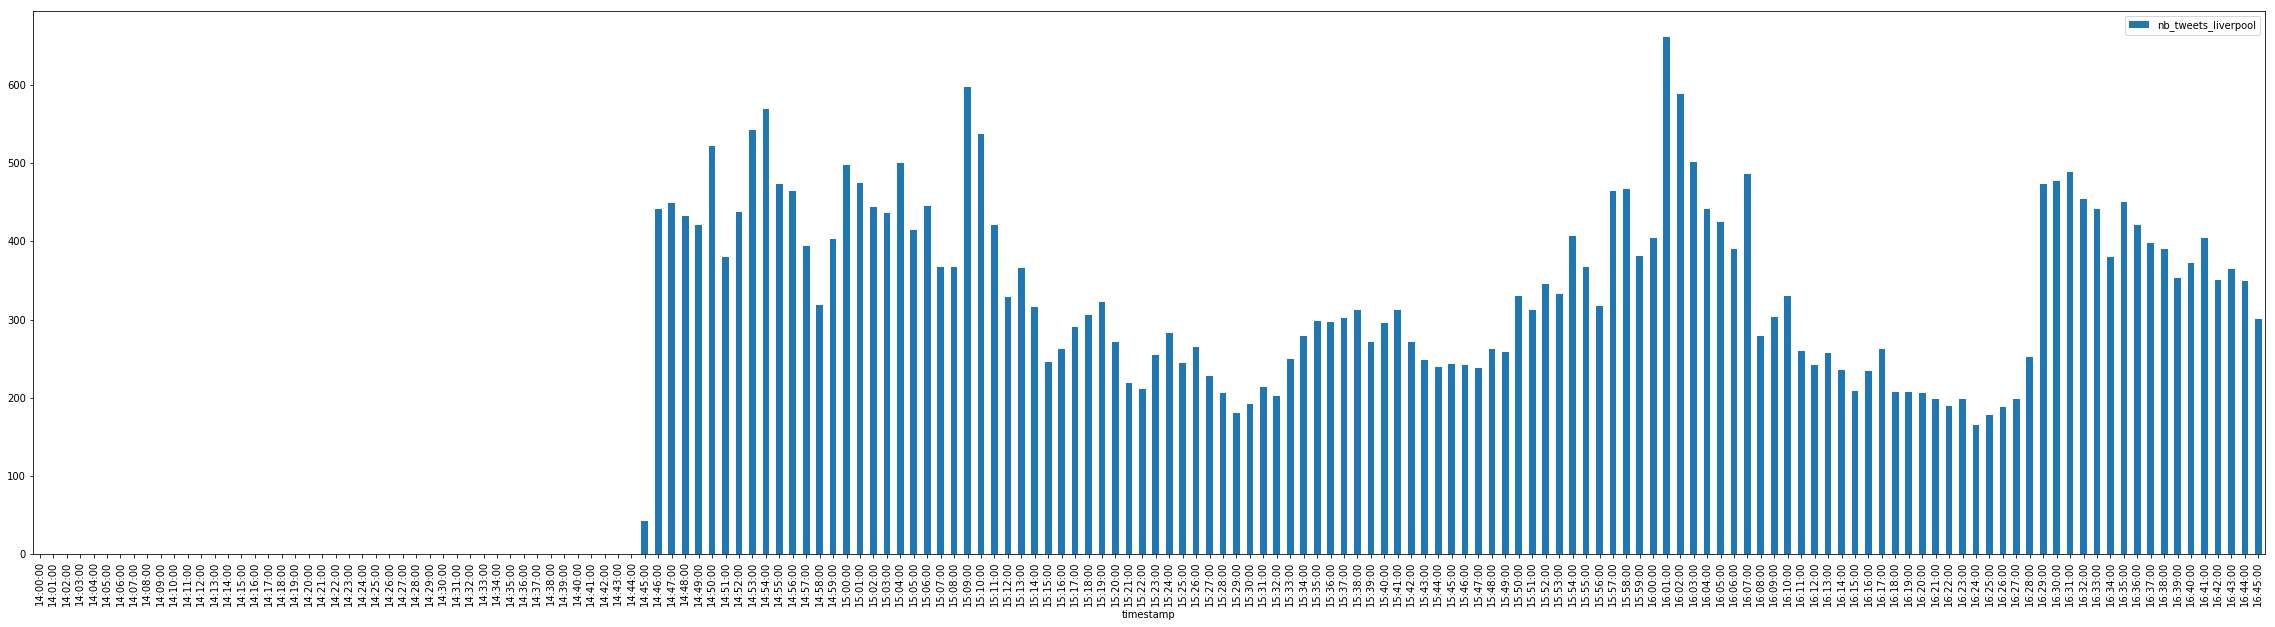

In [7]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "term":{
                            "text":"liverpool" #<----- Filtrar la palabra Liverpool
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minutos
                            }
                        }
                    }
                }) 
df_liverpoolByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_liverpoolByMinutes = df_liverpoolByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_liverpool'})
## Filtrar Datos
df_liverpoolByMinutes_filtered = df_liverpoolByMinutes.drop(df_liverpoolByMinutes[df_liverpoolByMinutes.timestamp < 1527357600000 ].index)
## Cambiar Dato timestamp a tipo date
df_liverpoolByMinutes_filtered['timestamp']=df_liverpoolByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_liverpoolByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### b) El n√∫mero de tweets que hablan de ‚Äòmadrid‚Äô por cada minuto.

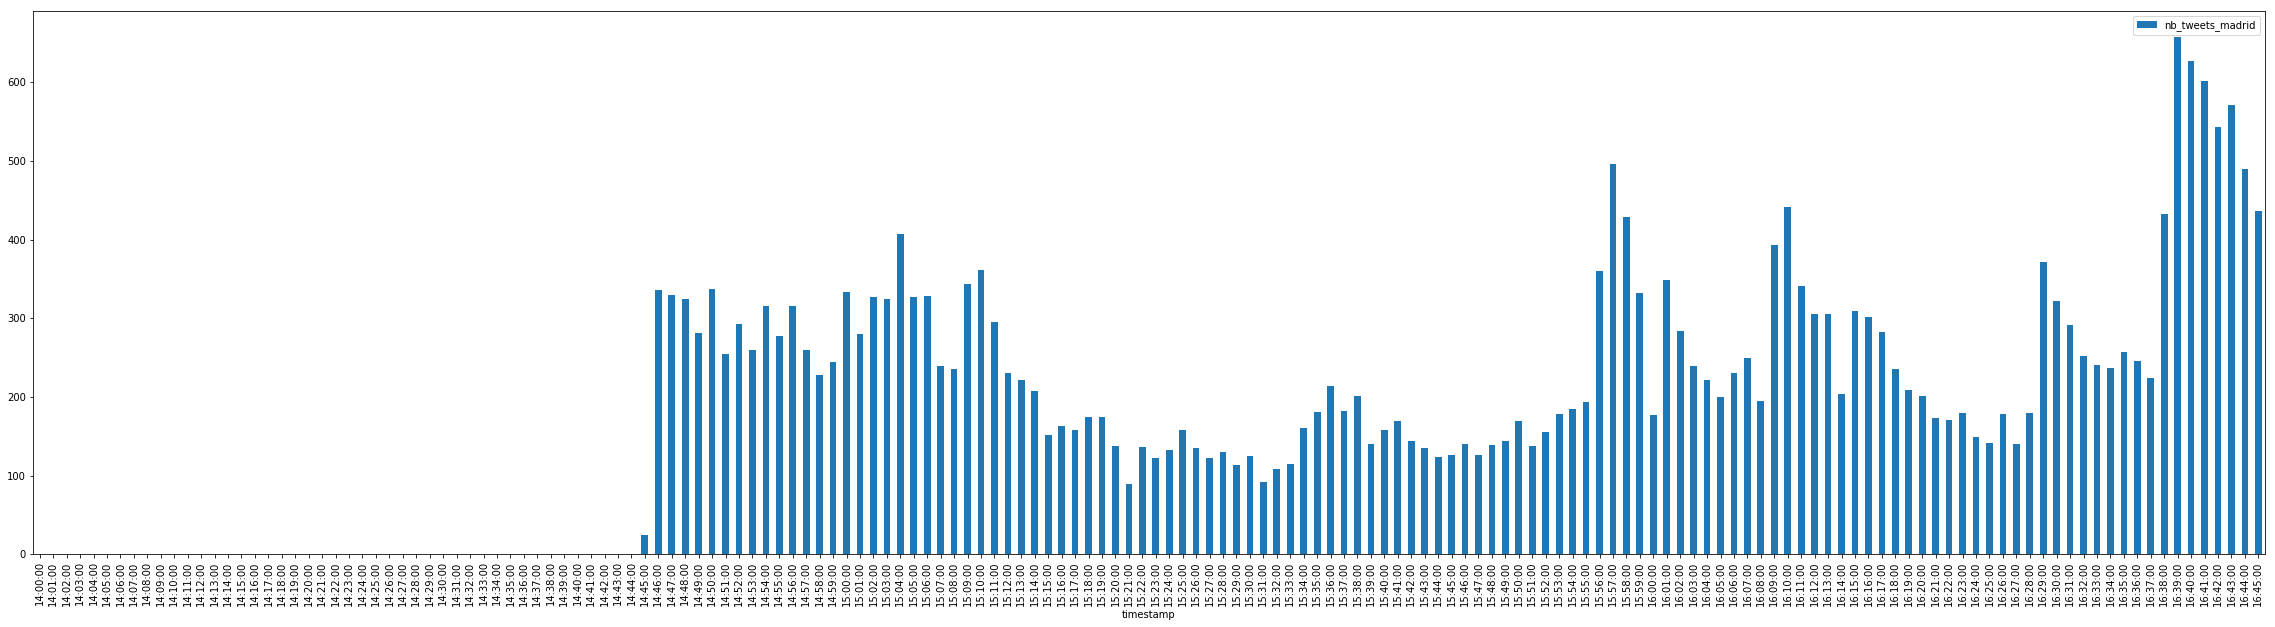

In [8]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "term":{
                            "text":"madrid" #<----- Filtrar la palabra Madrid
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minutos
                            }
                        }
                    }
                }) 
df_madridByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_madridByMinutes = df_madridByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_madrid'})
## Filtrar Datos
df_madridByMinutes_filtered = df_madridByMinutes.drop(df_madridByMinutes[df_madridByMinutes.timestamp < 1527357600000 ].index)
## Cambiar Dato timestamp a tipo date
df_madridByMinutes_filtered['timestamp']=df_madridByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_madridByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### c) ¬øA qu√© minuto se habla m√°s de Madrid?

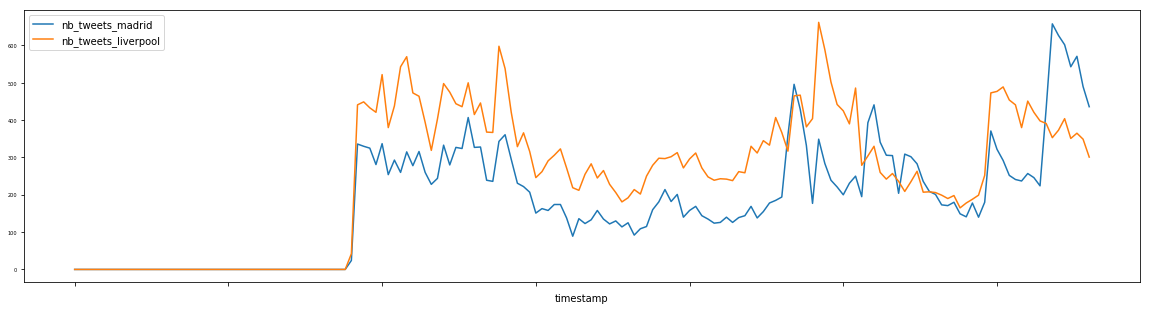

In [9]:
liverpoolmadrid = pd.concat([df_madridByMinutes_filtered, df_liverpoolByMinutes_filtered['nb_tweets_liverpool']], axis=1)
liverpoolmadrid.plot(kind='line', figsize=(20,5), fontsize=5, x='timestamp')

##### Crear Columnas para ver en que minuto hay mas tweets en liverpool y en madrid

In [10]:
liverpoolmadrid.loc[:,'madridmayor'] = 0
liverpoolmadrid.loc[:,'liverpoolmayor'] = 0
for i,fila in liverpoolmadrid.iterrows():
    if( fila['nb_tweets_madrid'] > fila['nb_tweets_liverpool'] ):
        liverpoolmadrid.loc[i,'madridmayor'] = 1
    elif( fila['nb_tweets_madrid'] < fila['nb_tweets_liverpool'] ):
        liverpoolmadrid.loc[i,'liverpoolmayor'] = 1        

##### Minutos en que hay m√°s tweet de madrid

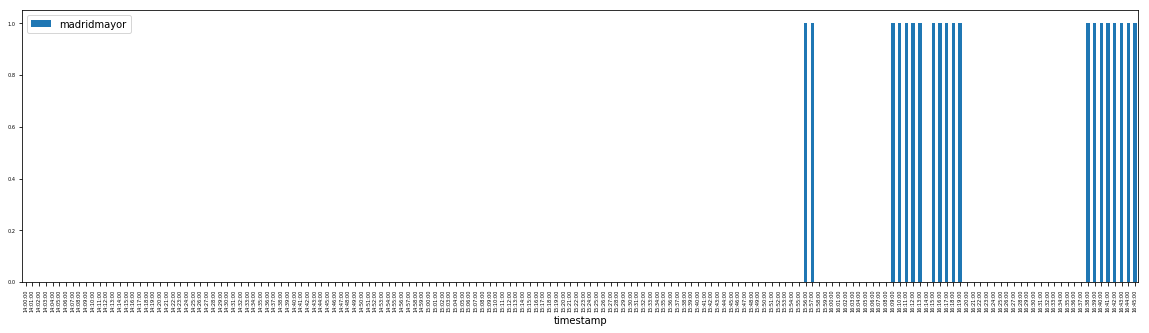

In [192]:
liverpoolmadrid[['madridmayor','timestamp']].plot(kind='bar', figsize=(20,5), fontsize=5, x='timestamp')

##### Minutos en que hay m√°s tweets de liverpool

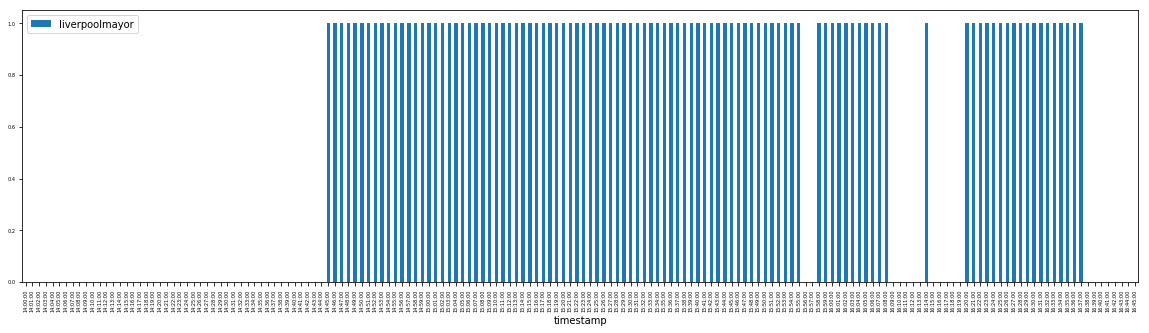

In [197]:
liverpoolmadrid[['liverpoolmayor','timestamp']].plot(kind='bar', figsize=(20,5), fontsize=5, x='timestamp')

##### Comparativa sobre en que minuto hay m√°s tweets

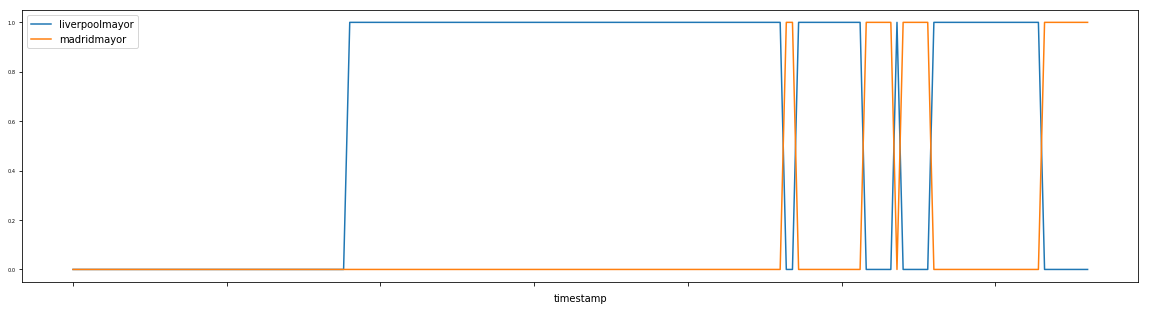

In [186]:
liverpoolmadrid[['liverpoolmayor','madridmayor','timestamp']].plot(kind='line', figsize=(20,5), fontsize=5, x='timestamp')

### 3. En un dataframe, mostrar el n√∫mero de tweets seg√∫n el pa√≠s indicado en el campo ‚Äòlocation‚Äô.

#### ¬øDesde cu√°les pa√≠ses se enviaron los tweets?

In [105]:
res = es.search(index="prueba_6", 
                body={
                    "aggs": {
                        "locations": {
                            "terms": {
                                "field": "location.keyword",
                                'size': 354586
                            }
                        }
                    }
                })

df_locations = pd.DataFrame(res['aggregations']['locations']['buckets'])
df_locations

doc_count                          key
0           3275               Lagos, Nigeria
1           2381                      Nigeria
2           1795              London, England
3           1624               Nairobi, Kenya
4           1534                 South Africa
5           1325   Johannesburg, South Africa
6           1111                       London
7            939                       Brasil
8            935               United Kingdom
9            880       Rio de Janeiro, Brasil
10           869                    Indonesia
11           832               Abuja, Nigeria
12           774                 Cairo, Egypt
13           766                     Malaysia
14           764                United States
15           750      England, United Kingdom
16           731                       Espa√±a
17           684                        Egypt
18           681                        Lagos
19           665       Pretoria, South Africa
20           659                       M√©xico
21           596                        Kenya
22           591                       Madrid
23           581                 Accra, Ghana
24           555                        India
25           552                     Colombia
26           542                Paris, France
27           536            Karachi, Pakistan
28           535            ƒ∞stanbul, T√ºrkiye
29           511              Los Angeles, CA
...          ...                          ...
68665          1                            üî•
68666          1                            üîÆ
68667          1                            üî∞
68668          1                       üî∞- 021
68669          1  üî¥ÿ™ÿ™ÿßÿÆÿ± ÿ®ÿßŸÑÿ±ÿØ ŸÑÿßÿ™ÿ®ÿßÿØŸÑ ÿßÿ®ÿØÿßüòí‚ùå
68670          1                            üïã
68671          1                           üï≥Ô∏è
68672          1                       üñêüèª‚úäüèª‚úåüèª
68673          1                           üññüèø
68674          1                           üñ§üóº
68675          1                           üó∫ 
68676          1                            üóΩ
68677          1  üòÇdo you realy want to know?
68678          1        üòÇüòÇI'd rather not say.
68679          1                    üôáüèæ‚Äç‚ôÇÔ∏èüåëüé£‚öóÔ∏è
68680          1                          üôàüôâüôä
68681          1    üöö üí®#MotulSuperFanüí®üí®Cuenca
68682          1                            üö©
68683          1                            üõ∏
68684          1                           ü§ëü§ë
68685          1                            ü§î
68686          1                            ü§ò
68687          1                        ü§∑üèæ‚Äç‚ôÇÔ∏è
68688          1   ü•ä allah u akbar / vdm city
68689          1     ü¶Åü¶çTomorrow never diesüï∏Ô∏èüêò
68690          1   ü¶Ç picando de vez en cuando
68691          1                     ü¶ÑNarniaüå∏
68692          1                            ü¶â
68693          1                       üßòüèª‚Äç‚ôÄÔ∏èüå±
68694          1                         üßü‚Äç‚ôÄÔ∏è

[68695 rows x 2 columns]

#### BONUS: mostrar los resultados en una mapa

### 4. En un histograma o en un line plot, visualizar dos series de datos:

#### a) El n√∫mero de tweets enviado desde Inglaterra, por cada minuto.

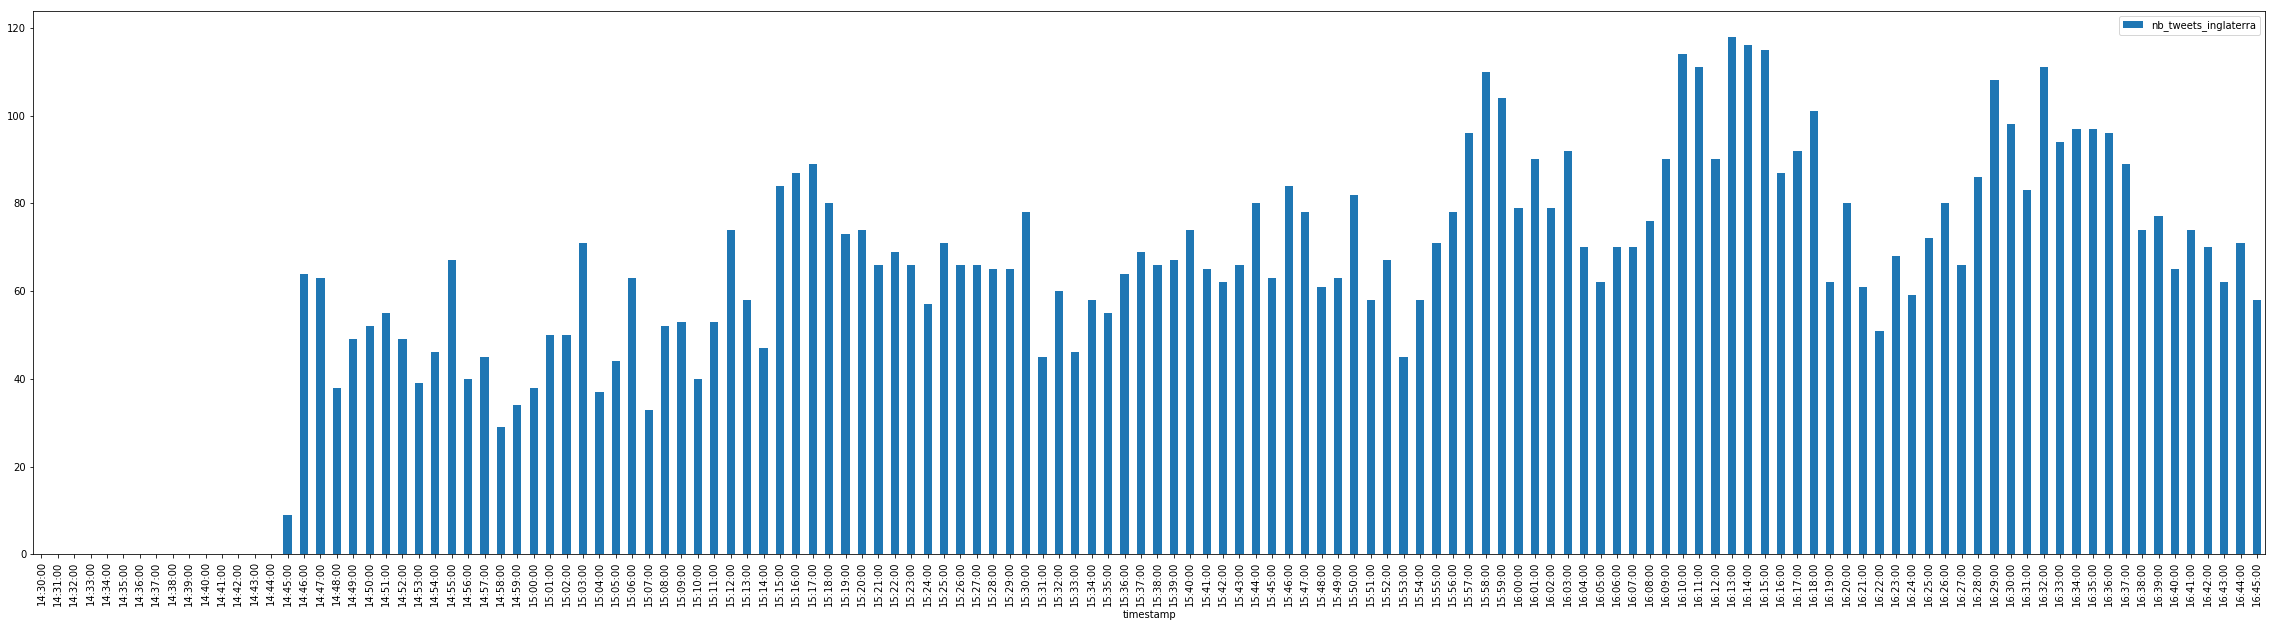

In [131]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "bool":{
                            "should" : [
                                { "term" : { "location" : "inglaterra" } },
                                { "term" : { "location" : "england" } },
                                { "term" : { "location" : "Inglaterra" } },
                                { "term" : { "location" : "England" } }
                              ]
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minutos
                            }
                        }
                    }
                }) 
df_inglaterraByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_inglaterraByMinutes = df_inglaterraByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_inglaterra'})
## Filtrar Datos
df_inglaterraByMinutes_filtered = df_inglaterraByMinutes.drop(df_inglaterraByMinutes[df_inglaterraByMinutes.timestamp < 1527359400000 ].index)
## Cambiar Dato timestamp a tipo date
df_inglaterraByMinutes_filtered['timestamp']=df_inglaterraByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_inglaterraByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### b) El n√∫mero de tweets enviado desde Espa√±a, por cada minuto.

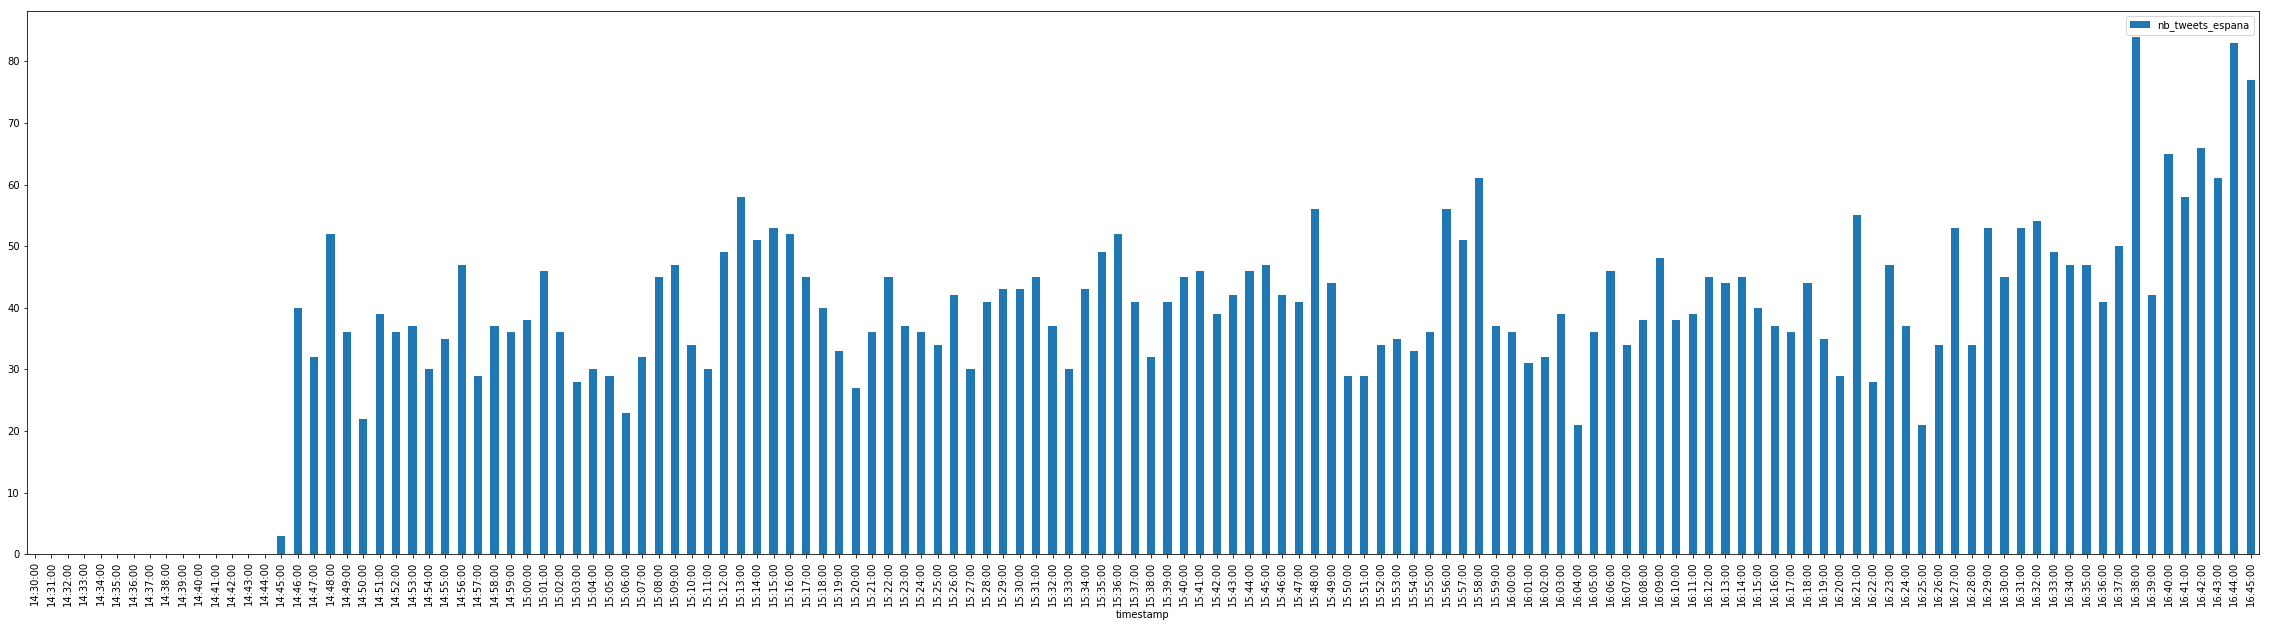

In [132]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "bool":{
                            "should" : [
                                { "term" : { "location" : "espa√±a" } },
                                { "term" : { "location" : "spain" } },
                                { "term" : { "location" : "Espa√±a" } },
                                { "term" : { "location" : "Spain" } },
                                { "term" : { "location" : "Espana" } },
                                { "term" : { "location" : "espana" } }
                              ]
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minutos
                            }
                        }
                    }
                }) 
df_espanaByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_espanaByMinutes = df_espanaByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_espana'})
## Filtrar Datos
df_espanaByMinutes_filtered = df_espanaByMinutes.drop(df_espanaByMinutes[df_espanaByMinutes.timestamp < 1527359400000 ].index)
## Cambiar Dato timestamp a tipo date
df_espanaByMinutes_filtered['timestamp']=df_espanaByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_espanaByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

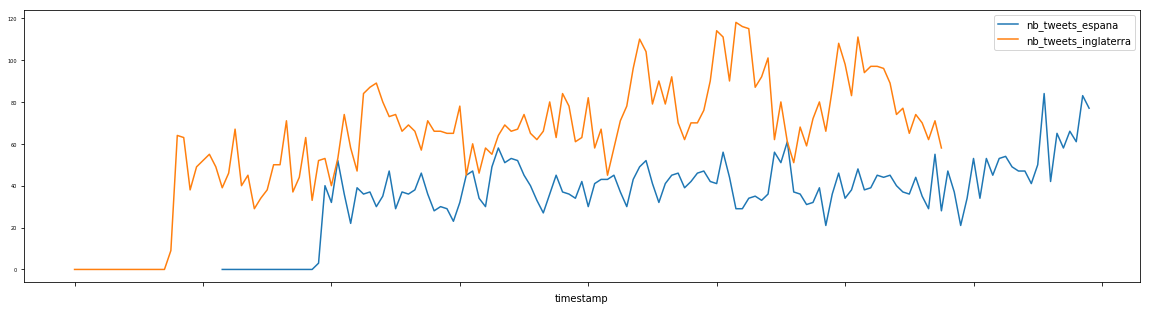

In [133]:
inglaterraespana = pd.concat([df_espanaByMinutes_filtered, df_inglaterraByMinutes_filtered['nb_tweets_inglaterra']], axis=1)
inglaterraespana.plot(kind='line', figsize=(20,5), fontsize=5, x='timestamp')

### 5. ¬øC√≥mo podr√≠amos analizar las emociones expresadas durante el partido? Proponer una metodolog√≠a para responder a esta pregunta. (No es obligatorio implementar su metodolog√≠a pero debe ser factible con las tecnolog√≠as que conocen).

Realizara dos listados:
* Adjetivos, Emojis y sustantivos calificativos __Positivos__
* Adjetivos, Emojis y sustantivos calificativos __Negativos__ 
Buscar√≠a la incidencia de palabras de los tweet en cada una de las listas. S√≠ tiene m√°s palabras pertenecientes al listado positivo, considerar√≠a que el tweet es __emocionalmente positivo__, mientras que si contiene m√°s palabras negativas considerar√≠a que el tweet es __emocionalmente negativo__, en el caso que presente la misma cantidad de palabras positivas y negativas o no presente palabras en estos listados el tweet se considerara __emocionalmente neutro__.